# Load data

In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
torch.cuda.empty_cache()
torch.cuda.synchronize()

train_data_dir = r"./datasets/mnist/train"
valid_data_dir = r"./datasets/mnist/test"

In [2]:
# setting up transformation
transformation = transforms.Compose([
    transforms.ToTensor(),
])
type(transformation)

torchvision.transforms.transforms.Compose

In [3]:
from core.dataloaders.mnist import MnistDataset

# creating dataset
train_dataset = MnistDataset(
    data_dir=train_data_dir,
    train = True,
    transform=transformation
)
valid_dataset = MnistDataset(
    data_dir=valid_data_dir,
    train = False,
    transform=transformation
)

classes = train_dataset.classes
print(classes)

Folder './datasets/mnist/train' already exists.
Folder './datasets/mnist/test' already exists.
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']


training set 60000
valid set 10000
shapes:
torch.Size([1024, 1, 28, 28])
torch.Size([1024])


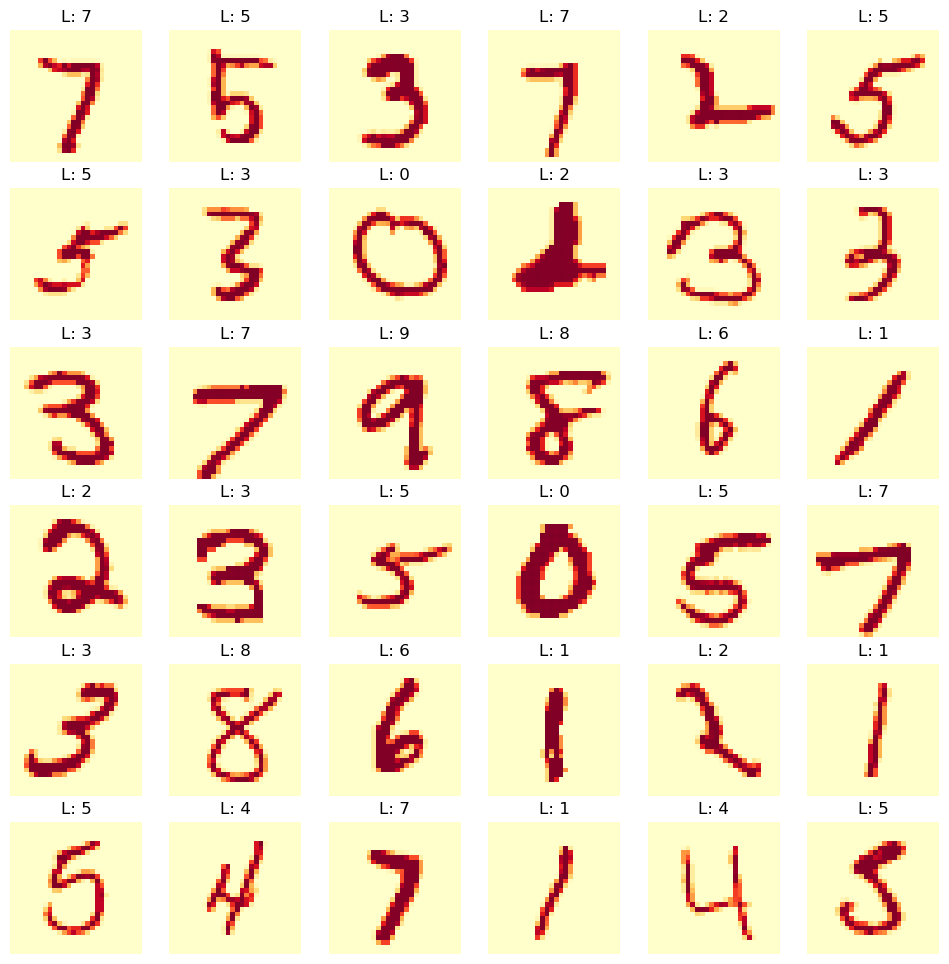

In [4]:
# creating dataloader
from shared_modules.display_engine import DisplayImages
# creating dataloader
workers = 8
prefetch = workers * 12
train_dataloader = DataLoader(train_dataset,
                              batch_size=1024,
                              shuffle=True,
                              num_workers=workers,
                              prefetch_factor=prefetch,
                              persistent_workers=True,
                              pin_memory=False)
valid_dataloader = DataLoader(valid_dataset,
                              batch_size=256,
                              shuffle=False,
                              num_workers=workers,
                              prefetch_factor=prefetch,
                              persistent_workers=True,
                              pin_memory=False)

print("training set", len(train_dataloader.dataset))
print("valid set", len(valid_dataloader.dataset))

# iterating over the dataset
for _, (image, label) in enumerate(train_dataloader):
    print("shapes:")
    print(image.shape)
    print(label.shape)
    break
    
DisplayImages.display_image(image, label)

In [5]:
from core.classifier_models.simplevit import SimpleVitClassifier
model = SimpleVitClassifier()

In [6]:
# create optimizer and loss function
import torch.nn as nn
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [7]:
# create wrapper
from core.wrappers.wrapper import Wrapper
classifier = Wrapper(model = model, optimizer= optimizer, criterion= criterion, device = "cuda")

In [8]:
from torchinfo import summary
input_size = image.shape
summary(model=classifier.model,
        input_size=input_size,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                            Input Shape          Output Shape         Param #              Trainable
SimpleVitClassifier (SimpleVitClassifier)          [1024, 1, 28, 28]    [1024, 10]           --                   True
├─SimpleViT (base_model)                           [1024, 1, 28, 28]    [1024, 10]           --                   True
│    └─Sequential (to_patch_embedding)             [1024, 1, 28, 28]    [1024, 16, 256]      --                   True
│    │    └─Rearrange (0)                          [1024, 1, 28, 28]    [1024, 16, 49]       --                   --
│    │    └─LayerNorm (1)                          [1024, 16, 49]       [1024, 16, 49]       98                   True
│    │    └─Linear (2)                             [1024, 16, 49]       [1024, 16, 256]      12,800               True
│    │    └─LayerNorm (3)                          [1024, 16, 256]      [1024, 16, 256]      512                  True
│    └─Transformer (transformer)             

[6, 7, 8, 7, 6, 8, 6, 8, 6, 8, 7, 7, 7, 7, 8, 8, 7, 8, 6, 7, 7, 7, 7, 8, 6, 7, 7, 6, 7, 7, 8, 7, 7, 8, 7, 6, 7, 7, 7, 8, 8, 7, 7, 8, 8, 7, 7, 8, 6, 7, 7, 6, 6, 8, 6, 7, 6, 7, 8, 7, 7, 8, 7, 8, 7, 8, 7, 7, 7, 6, 8, 6, 8, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 7, 7, 6, 7, 7, 6, 8, 7, 7, 8, 8, 7, 7, 8, 8, 7, 7, 7, 7, 7, 7, 6, 7, 8, 7, 8, 8, 7, 7, 7, 8, 7, 6, 7, 7, 6, 8, 7, 8, 7, 8, 6, 8, 7, 8, 7, 7, 6, 7, 7, 8, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 8, 8, 7, 7, 7, 7, 6, 7, 7, 6, 7, 8, 7, 7, 6, 7, 6, 7, 8, 8, 7, 7, 7, 8, 8, 8, 8, 8, 7, 8, 8, 8, 7, 7, 6, 8, 7, 8, 8, 6, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 8, 7, 7, 7, 8, 7, 8, 7, 7, 8, 8, 7, 7, 8, 8, 8, 8, 6, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 7, 7, 7, 8, 8, 8, 7, 8, 8, 8, 7, 8, 6, 8, 7, 6, 8, 7, 7, 7, 7, 8, 7, 7, 7, 7, 7, 7, 7, 7, 8, 7, 7, 7, 8, 8, 8, 8, 8, 6, 7, 8, 7, 7, 7, 8, 8, 7, 7, 8, 7, 8, 7, 7, 8, 7, 6, 7, 8, 8, 8, 8, 6, 7, 8, 6, 6, 6, 7, 7, 7, 7, 7, 8, 6, 7, 8, 7, 7, 7, 8, 8, 8, 8, 7, 7, 8, 6, 6, 7, 7, 8, 8, 7, 7, 8, 6, 7, 8, 8, 8, 8, 

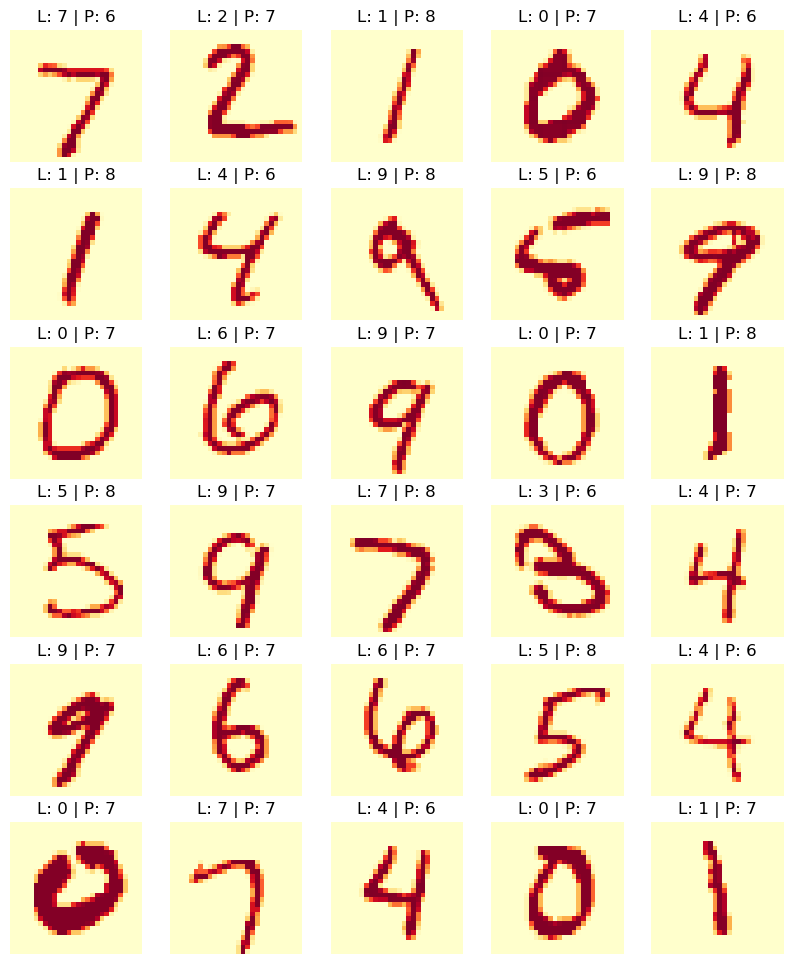

In [9]:
# model accuracy pre training
predictions = classifier.predict(valid_dataloader)
print(predictions)
loss, acc = classifier.evaluate(valid_dataloader)
print(loss, acc)

for _, (image, label) in enumerate(valid_dataloader):
    break
    
DisplayImages.display_image(images = image,
                            labels = label,
                            preds = predictions,
                            grid_x = 6,
                            grid_y = 5)

In [10]:
num_epochs = 20
classifier.fit(epochs=num_epochs, train_dataloader = train_dataloader, valid_dataloader=valid_dataloader)

Epochs::   5%|▌         | 1/20 [00:05<01:42,  5.37s/it]

| Epoch 1/20 | T-loss: 1.457 | V-loss: 0.920 |T-acc: 0.53 |V-acc: 0.71


Epochs::  10%|█         | 2/20 [00:10<01:33,  5.18s/it]

| Epoch 2/20 | T-loss: 0.640 | V-loss: 0.434 |T-acc: 0.80 |V-acc: 0.87


Epochs::  15%|█▌        | 3/20 [00:15<01:26,  5.12s/it]

| Epoch 3/20 | T-loss: 0.353 | V-loss: 0.287 |T-acc: 0.89 |V-acc: 0.92


Epochs::  20%|██        | 4/20 [00:20<01:21,  5.09s/it]

| Epoch 4/20 | T-loss: 0.243 | V-loss: 0.225 |T-acc: 0.93 |V-acc: 0.93


Epochs::  25%|██▌       | 5/20 [00:25<01:16,  5.12s/it]

| Epoch 5/20 | T-loss: 0.186 | V-loss: 0.186 |T-acc: 0.94 |V-acc: 0.94


Epochs::  30%|███       | 6/20 [00:30<01:11,  5.13s/it]

| Epoch 6/20 | T-loss: 0.148 | V-loss: 0.169 |T-acc: 0.96 |V-acc: 0.95


Epochs::  35%|███▌      | 7/20 [00:35<01:06,  5.11s/it]

| Epoch 7/20 | T-loss: 0.117 | V-loss: 0.146 |T-acc: 0.97 |V-acc: 0.96


Epochs::  40%|████      | 8/20 [00:40<01:01,  5.09s/it]

| Epoch 8/20 | T-loss: 0.099 | V-loss: 0.144 |T-acc: 0.97 |V-acc: 0.96


Epochs::  45%|████▌     | 9/20 [00:46<00:55,  5.09s/it]

| Epoch 9/20 | T-loss: 0.078 | V-loss: 0.146 |T-acc: 0.98 |V-acc: 0.96


Epochs::  50%|█████     | 10/20 [00:51<00:50,  5.08s/it]

| Epoch 10/20 | T-loss: 0.068 | V-loss: 0.127 |T-acc: 0.98 |V-acc: 0.96


Epochs::  55%|█████▌    | 11/20 [00:56<00:45,  5.08s/it]

| Epoch 11/20 | T-loss: 0.050 | V-loss: 0.133 |T-acc: 0.99 |V-acc: 0.96


Epochs::  60%|██████    | 12/20 [01:01<00:40,  5.07s/it]

| Epoch 12/20 | T-loss: 0.043 | V-loss: 0.142 |T-acc: 0.99 |V-acc: 0.96


Epochs::  65%|██████▌   | 13/20 [01:06<00:35,  5.07s/it]

| Epoch 13/20 | T-loss: 0.035 | V-loss: 0.134 |T-acc: 0.99 |V-acc: 0.96


Epochs::  70%|███████   | 14/20 [01:11<00:30,  5.07s/it]

| Epoch 14/20 | T-loss: 0.025 | V-loss: 0.129 |T-acc: 0.99 |V-acc: 0.96


Epochs::  75%|███████▌  | 15/20 [01:16<00:25,  5.06s/it]

| Epoch 15/20 | T-loss: 0.018 | V-loss: 0.134 |T-acc: 1.00 |V-acc: 0.97


Epochs::  80%|████████  | 16/20 [01:21<00:20,  5.05s/it]

| Epoch 16/20 | T-loss: 0.014 | V-loss: 0.140 |T-acc: 1.00 |V-acc: 0.97


Epochs::  85%|████████▌ | 17/20 [01:26<00:15,  5.04s/it]

| Epoch 17/20 | T-loss: 0.011 | V-loss: 0.139 |T-acc: 1.00 |V-acc: 0.96


Epochs::  90%|█████████ | 18/20 [01:31<00:10,  5.04s/it]

| Epoch 18/20 | T-loss: 0.008 | V-loss: 0.141 |T-acc: 1.00 |V-acc: 0.96


Epochs::  95%|█████████▌| 19/20 [01:36<00:05,  5.06s/it]

| Epoch 19/20 | T-loss: 0.007 | V-loss: 0.137 |T-acc: 1.00 |V-acc: 0.97


Epochs:: 100%|██████████| 20/20 [01:41<00:00,  5.09s/it]

| Epoch 20/20 | T-loss: 0.005 | V-loss: 0.150 |T-acc: 1.00 |V-acc: 0.96


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 9, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 4, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 2, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 8, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

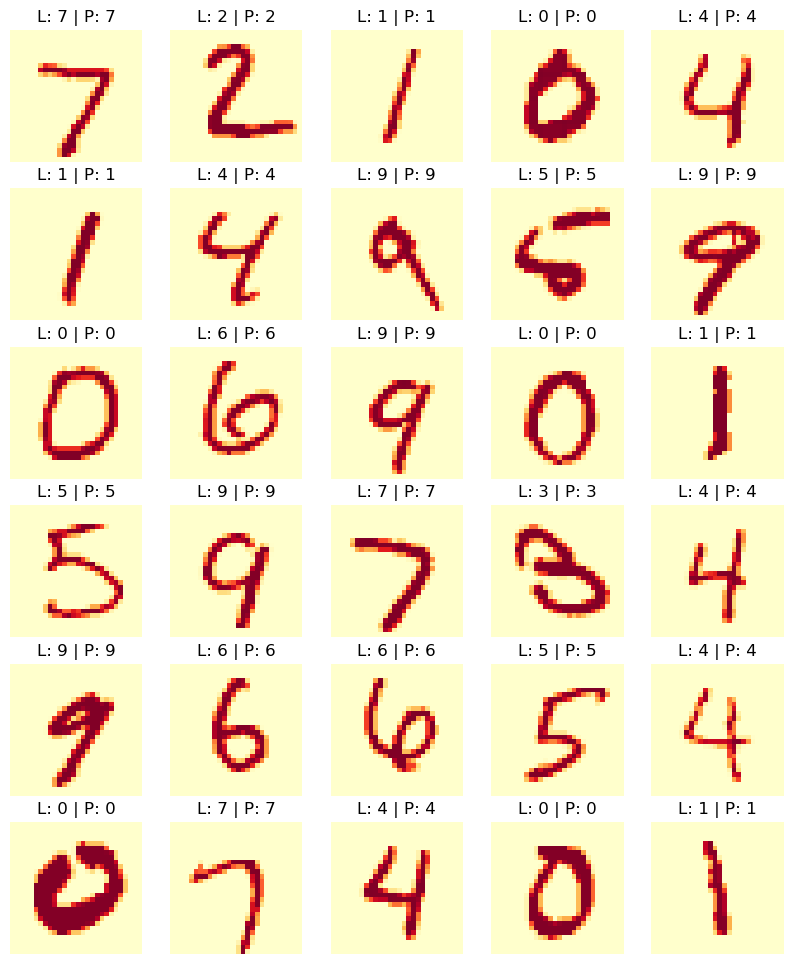

In [11]:
# model accuracy post training
predictions = classifier.predict(valid_dataloader)
print(predictions)
loss, acc = classifier.evaluate(valid_dataloader)
print(loss, acc)

for _, (image, label) in enumerate(valid_dataloader):
    break
    
DisplayImages.display_image(images = image,
                            labels = label,
                            preds = predictions,
                            grid_x = 6,
                            grid_y = 5)

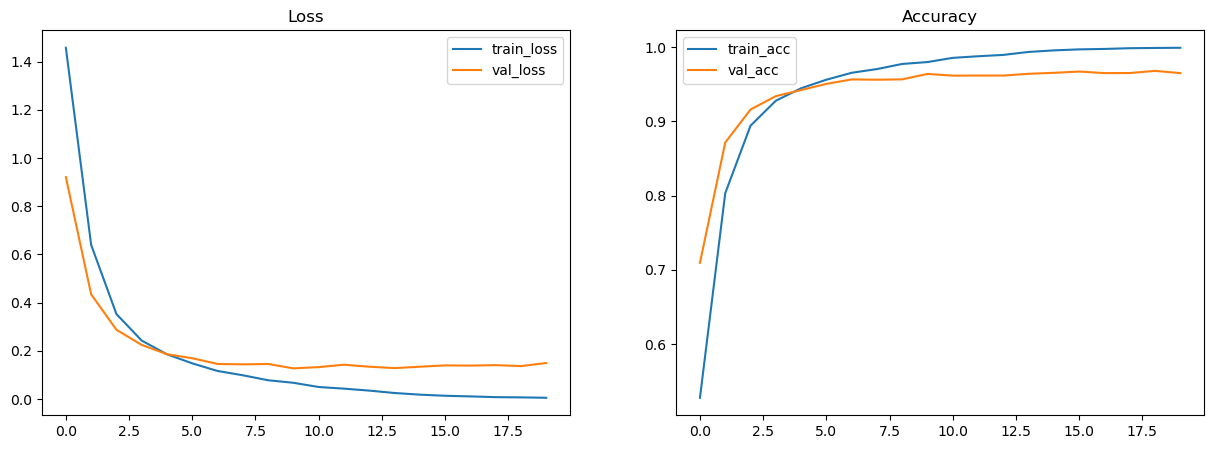

In [12]:
from shared_modules.display_engine import DisplayMetrics

DisplayMetrics.display_metrics(classifier.train_losses,
                               classifier.val_losses,
                               classifier.train_acc,
                               classifier.val_acc)